In [2]:
import pandas as pd
import numpy as np
from  pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score
from sklearn.preprocessing import Imputer

In [3]:
train_data = pd.read_csv("./Dataset/Train_data.csv")
test_data = pd.read_csv("./Dataset/Test_data.csv")

In [4]:
train_data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [5]:
test_data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Churn
0,HI,101,510,354-8815,no,no,0,70.9,123,12.05,...,73,18.01,236.0,73,10.62,10.6,3,2.86,3,False.
1,MT,137,510,381-7211,no,no,0,223.6,86,38.01,...,139,20.81,94.2,81,4.24,9.5,7,2.57,0,False.
2,OH,103,408,411-9481,no,yes,29,294.7,95,50.10,...,105,20.17,300.3,127,13.51,13.7,6,3.70,1,False.
3,NM,99,415,418-9100,no,no,0,216.8,123,36.86,...,88,10.74,220.6,82,9.93,15.7,2,4.24,1,False.
4,SC,108,415,413-3643,no,no,0,197.4,78,33.56,...,101,10.54,204.5,107,9.20,7.7,4,2.08,2,False.


In [6]:
# COMBINING TRAIN AND TEST DATA
train_data["training_data"] = 1
test_data["training_data"] = 2
train_test = train_data.append(test_data)
train_test = train_test.reset_index(drop=True)
print(train_test.shape)
train_test.head(5000)

(5000, 22)


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Churn,training_data
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,16.78,244.7,91,11.01,10.0,3,2.70,1,False.,1
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,16.62,254.4,103,11.45,13.7,3,3.70,1,False.,1
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,10.30,162.6,104,7.32,12.2,5,3.29,0,False.,1
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,5.26,196.9,89,8.86,6.6,7,1.78,2,False.,1
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,12.61,186.9,121,8.41,10.1,3,2.73,3,False.,1
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,18.75,203.9,118,9.18,6.3,6,1.70,0,False.,1
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,29.62,212.6,118,9.57,7.5,7,2.03,3,False.,1
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,8.76,211.8,96,9.53,7.1,6,1.92,0,False.,1
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,29.89,215.8,90,9.71,8.7,4,2.35,1,False.,1
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,18.87,326.4,97,14.69,11.2,5,3.02,0,False.,1


In [7]:
train_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 22 columns):
state                            5000 non-null object
account length                   5000 non-null int64
area code                        5000 non-null int64
phone number                     5000 non-null object
international plan               5000 non-null object
voice mail plan                  5000 non-null object
number vmail messages            5000 non-null int64
total day minutes                5000 non-null float64
total day calls                  5000 non-null int64
total day charge                 5000 non-null float64
total eve minutes                5000 non-null float64
total eve calls                  5000 non-null int64
total eve charge                 5000 non-null float64
total night minutes              5000 non-null float64
total night calls                5000 non-null int64
total night charge               5000 non-null float64
total intl minutes           

# Pre-processing and data cleaning

In [8]:
train_test.Churn = np.where(train_test.Churn==' False.', 0, 1)

# for column 'voice mail plan'
train_test['voice mail plan'] = train_test['voice mail plan'].astype('category').cat.codes
# for column 'voice mail plan'
train_test['international plan'] = train_test['international plan'].astype('category').cat.codes
# for column 'state'
train_test.state = train_test.state.astype('category').cat.codes

train_test = train_test.drop(labels=['phone number'], axis=1)     #dropping phone number column
train_test.Churn = train_test.Churn.astype('object')

# Feature Selection

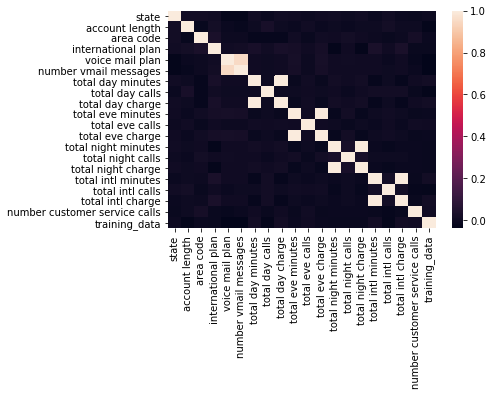

In [9]:
# heat map
corr = train_test.corr()
sns.heatmap(corr)

In [10]:
# chisq test
p_values = []
for col in train_test.columns:
    print(col)
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(train_test.Churn, train_test[col]))
    p_values.append(p)
    print(p)

state
7.850836224371827e-05
account length
0.9164350741820516
area code
0.7546581385329686
international plan
1.9443947474998577e-74
voice mail plan
7.164501780988496e-15
number vmail messages
0.00020125744384152328
total day minutes
2.8394963850721003e-20
total day calls
0.07865300432636355
total day charge
2.8394963850721003e-20
total eve minutes
0.06859434773011679
total eve calls
0.7612391081751979
total eve charge
0.026866451343047174
total night minutes
0.8728894718024558
total night calls
0.9405017867252645
total night charge
0.7547203743545484
total intl minutes
0.0005006306730069841
total intl calls
1.3855418957748761e-05
total intl charge
0.0005006306730069841
number customer service calls
4.186291993492475e-101
Churn
0.0
training_data
0.3343167771249668


In [11]:
# Selecting features based on the above two results
selected_features = []
for val in p_values:
    selected_features.append(val<0.05)
    
train_test = train_test.iloc[:, selected_features]
train_test = train_test.drop(labels=['total day minutes', 'total intl minutes'], axis=1)
train_test.shape    

(5000, 10)

In [12]:
train_test['training_data'] = train_data.training_data
train_test.training_data = np.where(train_test.training_data==1, 1, 0)

# Feature Scaling

Normalization

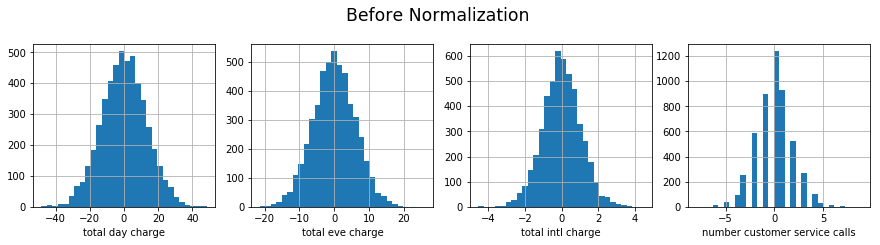

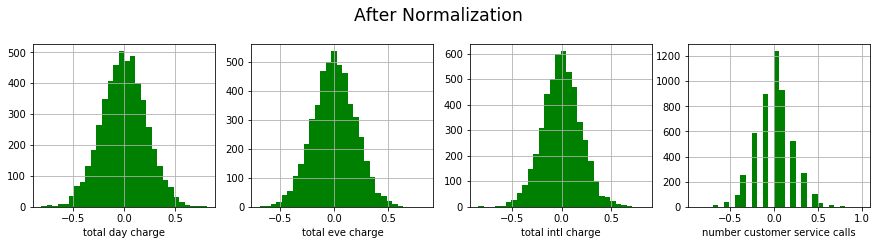

In [13]:
cols = ['total day charge','total eve charge', 'total intl charge', 'number customer service calls']
plt.figure()
i = 1
plt.suptitle('Before Normalization', x=0.5, y=1.05, ha='center', fontsize='xx-large')
for col in cols:
    plt.subplot(1,4,i)
    p = train_test[col].diff().hist(figsize=(15,3), bins=30)
    p.set_xlabel(col)
    i = i + 1
    
# cols = ['total day charge','total eve charge', 'total intl charge', 'number customer service calls']
plt.figure()
plt.suptitle('After Normalization', x=0.5, y=1.05, ha='center', fontsize='xx-large')
i = 1
for col in cols:
    plt.subplot(1,4,i)
    train_test[col] = (train_test[col] - train_test[col].min())/(train_test[col].max() - train_test[col].min())
    p = train_test[col].diff().hist(figsize=(15,3), bins=30, color = 'g')
    p.set_xlabel(col)
    i = i + 1    

Standardization

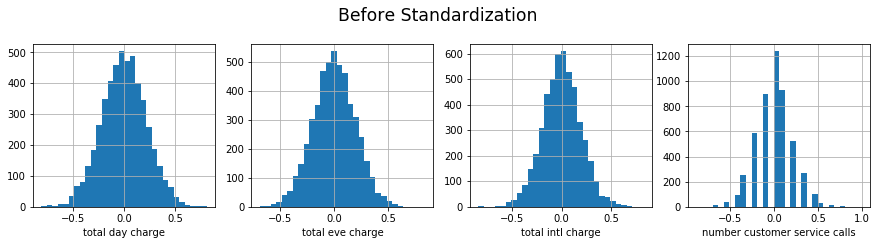

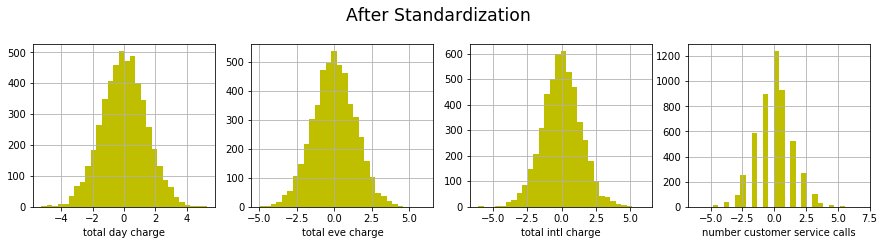

In [14]:
cols = ['total day charge','total eve charge', 'total intl charge', 'number customer service calls']
plt.figure()
i = 1
plt.suptitle('Before Standardization', x=0.5, y=1.05, ha='center', fontsize='xx-large')
for col in cols:
    plt.subplot(1,4,i)
    p = train_test[col].diff().hist(figsize=(15,3), bins=30)
    p.set_xlabel(col)
    i = i + 1
    
# cols = ['total day charge','total eve charge', 'total intl charge', 'number customer service calls']
plt.figure()
plt.suptitle('After Standardization', x=0.5, y=1.05, ha='center', fontsize='xx-large')
i = 1
for col in cols:
    plt.subplot(1,4,i)
    train_test[col] = (train_test[col] - train_test[col].mean()) / train_test[col].std()
    p = train_test[col].diff().hist(figsize=(15,3), bins=30, color = 'y')
    p.set_xlabel(col)
    i = i + 1    

# SPLITTING DATA INTO TRAIN AND TEST

In [15]:
train = train_test[train_test.training_data == 1]
test = train_test[train_test.training_data == 0]
train = train.drop(labels='training_data', axis=1)
test = test.drop(labels='training_data', axis=1)
print("Shape of train : " + str(train.shape))
print("Shape of test : " + str(test.shape))

Shape of train : (3333, 10)
Shape of test : (1667, 10)


In [16]:
train = train.drop(labels='state', axis=1)
test = test.drop(labels='state', axis=1)

# MODEL BUILDING

In [17]:
mod_name = []
accuracy = []
precision_score = []
recall_score = []
f1_score = []
false_negative = []

def register_model_with_scores(name, acc, precision, recall, f1, fn):
    mod_name.append(name)
    accuracy.append(acc)
    precision_score.append(precision)
    recall_score.append(recall)
    f1_score.append(f1)
    false_negative.append(fn)

    
def generate_score(model_name, test, predicted, print_scores = 1, register_model = 1):
    from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
    acc = accuracy_score(test.Churn.astype('float'), predicted)
    f1 = f1_score(test.Churn.astype('float'), predicted)
    precision = precision_score(test.Churn.astype('float'), predicted)
    recall = recall_score(test.Churn.astype('float'), predicted)
    conf_mat = pd.crosstab(test.Churn, predicted, rownames=['actual'], colnames=['predicted'])
    FN = conf_mat.iloc[1,0]
    if(print_scores==1):
        print("Accuracy : " + str(acc))
        print("Precision : " + str(precision))
        print("Recall : " + str(recall))
        print("False Negative : " + str(FN))
        print("F1 : " + str(f1))
    if(register_model==1):    
        register_model_with_scores(model_name, acc, precision, recall, f1, FN)
    return conf_mat, f1

In [18]:
except_Churn = train.columns
except_Churn = except_Churn[0:8]
except_Churn

Index(['international plan', 'voice mail plan', 'number vmail messages',
       'total day charge', 'total eve charge', 'total intl calls',
       'total intl charge', 'number customer service calls'],
      dtype='object')

### LOGISTIC REGRESSION 

In [19]:
from sklearn.linear_model import LogisticRegression
model_name = 'Logistic Regression'
logit = LogisticRegression()
logit.fit(X=train[except_Churn].astype('float'), y=train.Churn.astype('float'))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [20]:
predicted = logit.predict(test[except_Churn])
predicted = np.where(predicted>0.5, 1, 0)
predicted

array([0, 0, 0, ..., 0, 0, 0])

In [21]:
cm = pd.crosstab(test.Churn, predicted, rownames=['actual'], colnames=['predicted'])

In [22]:
TN = cm.iloc[0,0]
FP = cm.iloc[0,1]
FN = cm.iloc[1,0]
TP = cm.iloc[1,1]
acc = (TP+TN)/(FP + TN + FN + TP)
precision = TP/(FP+TP)
recall = TP/(FN+TP)
f1 = (2*precision*recall)/(precision+recall)
register_model_with_scores(model_name, acc, precision, recall, f1, FN)
print("Accuracy : " + str(acc))
print("Precision : " + str(precision))
print("Recall : " + str(recall))
print("F1 : " + str(f1))
cm

Accuracy : 0.8710257948410318
Precision : 0.5616438356164384
Recall : 0.18303571428571427
F1 : 0.27609427609427606


predicted,0,1
actual,,
0,1411,32
1,183,41


### DECISION TREE

In [23]:
from sklearn import tree
model_name = 'Decision Tree'
dt = tree.DecisionTreeClassifier(criterion='entropy')
dt.fit(X=train[except_Churn].astype('float'), y=train.Churn.astype('float'))

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [24]:
predicted = dt.predict(test[except_Churn])
predicted = np.where(predicted>0.5, 1, 0)
cm,f1 = generate_score(model_name, test, predicted)
cm

Accuracy : 0.9244151169766047
Precision : 0.7207207207207207
Recall : 0.7142857142857143
False Negative : 64
F1 : 0.7174887892376682


predicted,0,1
actual,,
0,1381,62
1,64,160


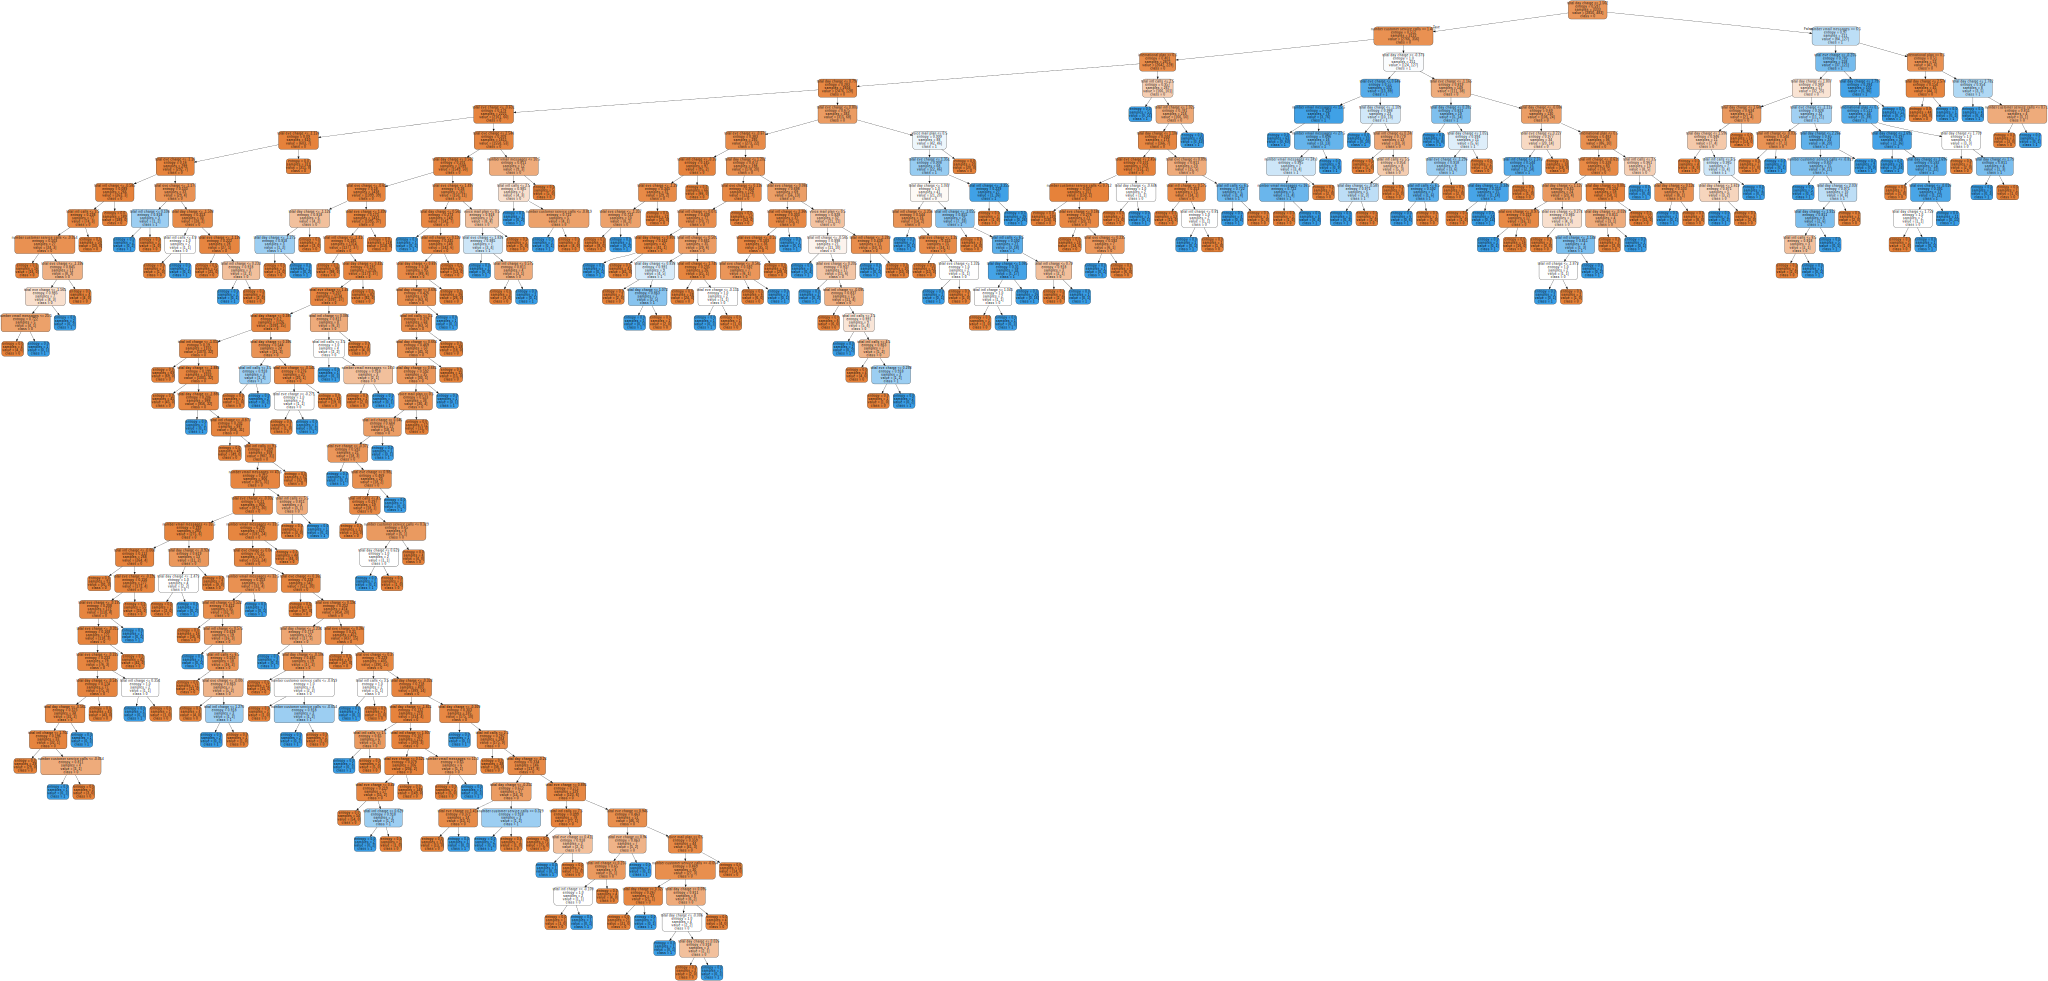

In [25]:
import graphviz
dot_data = tree.export_graphviz(dt, out_file=None, feature_names=train[except_Churn].columns, class_names=['0','1'], filled=True, rounded=True)
graphviz.Source(dot_data)

### RANDOM FOREST

In [26]:
from sklearn.ensemble import RandomForestClassifier
model_name = 'Random Forest'
rf = RandomForestClassifier(random_state=100, n_jobs=4, criterion='entropy')
rf.fit(X=train[except_Churn].astype('float'), y=train.Churn.astype('float'))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=4,
            oob_score=False, random_state=100, verbose=0, warm_start=False)

In [27]:
predicted = rf.predict(test[except_Churn])
predicted = np.where(predicted>0.5, 1, 0)
cm,f1 = generate_score(model_name, test, predicted, register_model=0)
cm

Accuracy : 0.9454109178164367
Precision : 0.9130434782608695
Recall : 0.65625
False Negative : 77
F1 : 0.7636363636363634


predicted,0,1
actual,,
0,1429,14
1,77,147


##### Parameters tuning 

In [28]:
#  best n_estimator value
f1_for_n_estimators = []
for i in range(1,50):
    rf = RandomForestClassifier(random_state=100, n_jobs=4, criterion='entropy', n_estimators=i)
    rf.fit(X=train[except_Churn].astype('float'), y=train.Churn.astype('float'))
    predicted = rf.predict(test[except_Churn])
    predicted = np.where(predicted>0.5, 1, 0)
    cm,f1 = generate_score(model_name, test, predicted, print_scores=0, register_model=0)
    f1_for_n_estimators.append(f1)
    
# print(f1_for_n_estimators)    
count = 1
max_val = max(f1_for_n_estimators)
for i in f1_for_n_estimators:
    if (i == max_val):
        best_estimator = count
    count = count + 1    
print("Best estimator value : " + str(best_estimator))     

Best estimator value : 27


In [29]:
rf = RandomForestClassifier(random_state=100, n_jobs=4, criterion='entropy', n_estimators=45)
rf.fit(X=train[except_Churn].astype('float'), y=train.Churn.astype('float'))
predicted = rf.predict(test[except_Churn])
predicted = np.where(predicted>0.5, 1, 0)
cm,f1 = generate_score(model_name, test, predicted)
cm

Accuracy : 0.9520095980803839
Precision : 0.9337349397590361
Recall : 0.6919642857142857
False Negative : 69
F1 : 0.7948717948717948


predicted,0,1
actual,,
0,1432,11
1,69,155


### SVM

In [30]:
from sklearn.svm import SVC
model_name = 'SVM'
svc = SVC()
svc.fit(X=train[except_Churn].astype('float'), y=train.Churn.astype('float'))

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [31]:
predicted = svc.predict(test[except_Churn])
predicted = np.where(predicted>0.5, 1, 0)
cm,f1 = generate_score(model_name, test, predicted, register_model=0)
cm

Accuracy : 0.9202159568086383
Precision : 0.9099099099099099
Recall : 0.45089285714285715
False Negative : 123
F1 : 0.6029850746268657


predicted,0,1
actual,,
0,1433,10
1,123,101


##### Parameters tuning 

In [32]:
#  best C value
f1_forC_values = []
for i in range(1,11):
    svc = SVC(C=i)
    svc.fit(X=train[except_Churn].astype('float'), y=train.Churn.astype('float'))
    predicted = svc.predict(test[except_Churn])
    predicted = np.where(predicted>0.5, 1, 0)
    cm, f1 = generate_score(model_name, test, predicted, print_scores=0, register_model=0)
    f1_forC_values.append(f1)
    
# print(f1_forC_values)
count = 1
max_val = max(f1_forC_values)
for i in f1_forC_values:
    if (i == max_val):
        best_C = count
    count = count + 1    
print("Best C value : " + str(best_C))        

Best C value : 10


In [33]:
#  best C value between 7 and 8
f1_forC_values = []
for i in np.arange(7,8,0.01):
    svc = SVC(C=i)
    svc.fit(X=train[except_Churn].astype('float'), y=train.Churn.astype('float'))
    predicted = svc.predict(test[except_Churn])
    predicted = np.where(predicted>0.5, 1, 0)
    cm, f1 = generate_score(model_name, test, predicted, print_scores=0, register_model=0)
    f1_forC_values.append(f1)
    
# print(f1_forC_values)
count = 7
max_val = max(f1_forC_values)
for i in f1_forC_values:
    if (i == max_val):
        best_C = count
    count = count + 0.01   
print("Final Best C value : " + str(best_C))    

Final Best C value : 7.569999999999988


In [34]:
svc = SVC(C=7.1699)
svc.fit(X=train[except_Churn].astype('float'), y=train.Churn.astype('float'))
predicted = svc.predict(test[except_Churn])
predicted = np.where(predicted>0.5, 1, 0)
cm,f1 = generate_score(model_name, test, predicted, register_model=1)
cm

Accuracy : 0.9328134373125375
Precision : 0.8636363636363636
Recall : 0.59375
False Negative : 91
F1 : 0.7037037037037037


predicted,0,1
actual,,
0,1422,21
1,91,133


### NAIVE BAYES 

In [35]:
from sklearn.naive_bayes import GaussianNB
model_name = 'Naive Bayes'
gnb = GaussianNB()
gnb.fit(X=train[except_Churn].astype('float'), y=train.Churn.astype('float'))

GaussianNB(priors=None)

In [36]:
predicted = gnb.predict(test[except_Churn])
predicted = np.where(predicted>0.5, 1, 0)
cm,f1 = generate_score(model_name, test, predicted)
cm

Accuracy : 0.8578284343131374
Precision : 0.46596858638743455
Recall : 0.39732142857142855
False Negative : 135
F1 : 0.4289156626506024


predicted,0,1
actual,,
0,1341,102
1,135,89


# Models Summary

In [37]:
df = pd.DataFrame({'model_name' : mod_name, 
              'accuracy' : accuracy, 
              'precision_score' : precision_score, 
              'recall_score' : recall_score, 
              'f1_score' : f1_score, 
              'false_negative' : false_negative}, 
                  columns=['model_name', 'precision_score', 'recall_score', 'false_negative', 'accuracy', 'f1_score'])
df

,model_name,precision_score,recall_score,false_negative,accuracy,f1_score
0,Logistic Regression,0.561644,0.183036,183,0.871026,0.276094
1,Decision Tree,0.720721,0.714286,64,0.924415,0.717489
2,Random Forest,0.933735,0.691964,69,0.952010,0.794872
3,SVM,0.863636,0.593750,91,0.932813,0.703704
4,Naive Bayes,0.465969,0.397321,135,0.857828,0.428916


# Conclusion

###### 1. From the above summary table we can se that highest accuracy and F1 score is achieved by Random Forest which is 95.20% and 79.487% respectively.

###### 2. But for Churn reduction, an existing customer is more valuable for a company. A company does not want its customer to stop using their services. Thus, in this scenario, false negative rate becomes an important factor to judge the performance of a model. False Negative means that our model has predicted that the customer will NOT stop using the services provided by the company but actually the prediction was FALSE. Thus, we can use Decision Tree for above scenerio as we can see that Decision Tree is giving least False Negative values which is 65.